# About this project

In this case study, we are data scientists at a real estate company in the city of Rio de Janeiro, Brazil. Our main function as data scientists is to support the demands of the Machine Learning team and the Development team of this company.

To meet this demand, we will analyze a real estate database in the city of Rio de Janeiro that contains different types of properties such as apartments, houses, businesses, among others. On this basis, we will find the rental values ​​of each property, condominium, IPTU and its characteristics such as: number of rooms, suites, parking spaces...

👨🏽‍💻 Access the database by clicking [here](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv).

## Importing the data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
data = pd.read_csv(url, sep=';')
data.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


For project portfolio purposes, I'm going to change the column names from Portuguese to English

In [3]:
data.columns = ["Type", "Neighborhood", "Bedrooms", "Parking", "Suites", "Area", "Price", "Condominium", "IPTU"]
data.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [2]:
data.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [4]:
type(data)

pandas.core.frame.DataFrame

## General characteristics of the database

In [5]:
data.shape

(32960, 9)

In [6]:
data.columns

Index(['Type', 'Neighborhood', 'Bedrooms', 'Parking', 'Suites', 'Area',
       'Price', 'Condominium', 'IPTU'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          32960 non-null  object 
 1   Neighborhood  32960 non-null  object 
 2   Bedrooms      32960 non-null  int64  
 3   Parking       32960 non-null  int64  
 4   Suites        32960 non-null  int64  
 5   Area          32960 non-null  int64  
 6   Price         32943 non-null  float64
 7   Condominium   28867 non-null  float64
 8   IPTU          22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
data["Type"]

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Type, Length: 32960, dtype: object

In [9]:
data[["Bedrooms", "Price"]]

,Bedrooms,Price
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


Our database contains 32,960 rows and 9 columns:
- Type: type of property;
- Neighborhood: district of the city of Rio de Janeiro;
- Bedrooms: number of bedrooms;
- Parking: number of garages;
- Suites: rooms with bathroom;
- Area: in square meters;
- Price: monthly value in real;
- Condominium: monthly value of the condominium in reais (added to the monthly value);
- IPTU: Tax on Urban Property and Land (a Brazilian tax that can be paid in cash or in installments).

##  Exploratory analysis
### What is the average rent amount by type of property?

In [10]:
data.head()

,Type,Neighborhood,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [11]:
data["Price"].mean()

12952.659715265761

In [12]:
data.groupby("Type").mean(numeric_only=True)

,Bedrooms,Parking,Suites,Area,Price,Condominium,IPTU
Type,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [14]:
# average rental prices by property type
data.groupby("Type")["Price"].mean()

Type
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

The visualization of this grouping by type, showing the values, can be improved by transforming this Series into a DataFrame. After this conversion we can sort the "Price" column in ascending order. Rental values will be shown from cheapest to most expensive.

As we can see in the DataFrame below, the properties of the Type 'Quitinete' (Kitchenette) are the ones with the cheapest average prices, followed by 'Pousada/Chalé' (Lodge/Cottage) and 'Casa de Vila' (Village House).

The property type with the highest average rent is 'Prédio Inteiro' (Entire Building), which are types of property usually rented by a large company for their facilities.

In [15]:
data.groupby("Type")[["Price"]].mean().sort_values("Price")

,Price
Type,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


Now let's plot this data into a horizontal bar chart using plot.
On the x-axis we have the average rent values and on the y-axis we have the types of properties.
The average rent values are varying a lot due to the fact that there are residential and commercial properties, which is why the values are so different.

<Axes: ylabel='Type'>

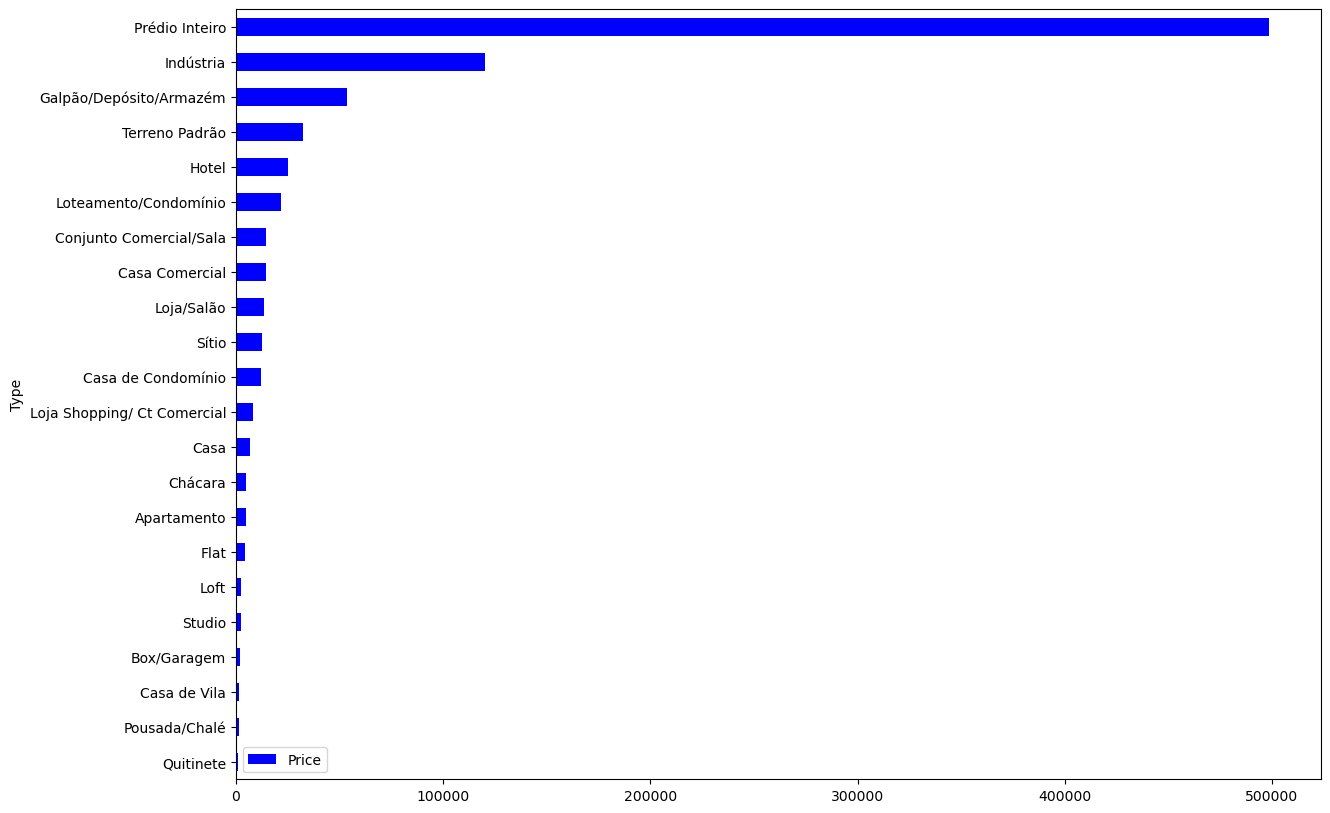

In [25]:
df_price_type = data.groupby("Type")[["Price"]].mean().sort_values("Price")

df_price_type.plot(kind='barh', figsize=(14,10), color='blue')